In [2]:
import networkx as nx
import pandas as pd
import random
import matplotlib.pyplot as plt

In [3]:
#Génère un graphe aléatoire composé de n sommets 
def random_graph(num_nodes):
    G = nx.Graph()
    for i in range(num_nodes):
        G.add_node(i)
    for i in range(num_nodes):
        for j in range(i + 1, num_nodes):
            weight = random.randint(1, 10)
            G.add_edge(i, j, weight=weight)
    return G

In [4]:
#Génère un graphe à partir d'une matrice d'adjascence en csv
def csv_to_graph(file_path):
    df = pd.read_csv(file_path, index_col=0)
    G = nx.Graph()
    for node in df.columns:
        G.add_node(node)
    for i in df.index:
        for j in df.columns:
            if i != j:
                weight = df.loc[i, j]
                if weight > 0:  
                    G.add_edge(i, j, weight=weight)
    return G


In [5]:
#Affiche visuellement le graphe
def plot_graph(G):
    pos = nx.spring_layout(G)
    edges = G.edges(data=True)
    nx.draw_networkx_nodes(G, pos, node_size=500)
    nx.draw_networkx_edges(G, pos, edgelist=edges)
    nx.draw_networkx_labels(G, pos, font_size=10, font_family="sans-serif")
    plt.show()

In [6]:
#Filtre les nodes souhaités d'un graphe
def filter_graph(G, selected_nodes):
    subG = G.subgraph(selected_nodes).copy()
    return subG

In [7]:
# Affiche visuellement le graphe avec les points choisis uniquement
def plot_filter_graph(G, selected_nodes=None):
    if selected_nodes is None:
        selected_nodes = list(G.nodes)
    subG = filter_graph(G, selected_nodes)
    pos = nx.spring_layout(subG)
    edges = subG.edges(data=True)
    nx.draw_networkx_nodes(subG, pos, node_size=500)
    # Dessiner les arêtes dirigées avec des flèches
    nx.draw_networkx_edges(subG, pos, edge_color='red', edgelist=edges, arrows=True, arrowstyle='-|>', arrowsize=20)
    nx.draw_networkx_labels(subG, pos, font_size=10, font_family="sans-serif")
    plt.show()

### Exemple d'utilisation

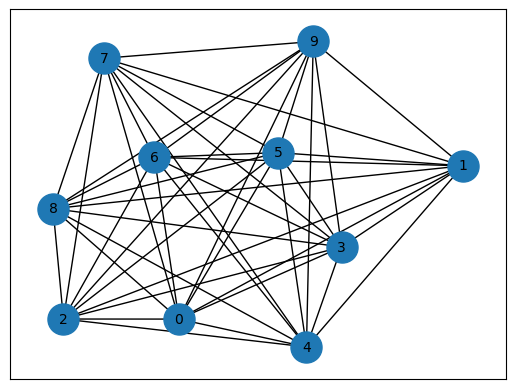

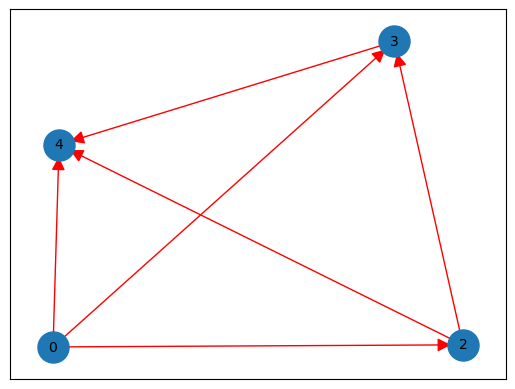

In [8]:
#Exemple de création de graphe
G = random_graph(10)

#Exemple d'affichage de graphe
plot_graph(G)

#Exemple d'affichage de chemin sur un graphe
plot_filter_graph(G,[0,2,3,4])